##### Random Forest  

data from [LendingClub.com](www.lendingclub.com)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
loans = pd.read_csv('loan_data.csv')

In [5]:
loans.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
loans.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

##### EDA

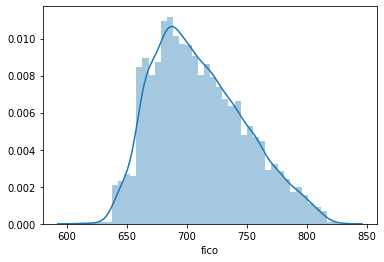

In [11]:
sns.distplot(loans['fico'])

(array([  2.,   1.,   1.,   2.,   6.,   5., 102.,   0., 112., 131., 127.,
        414., 438., 395.,   0., 427., 536., 548., 498., 476., 472.,   0.,
        444., 395., 424., 388., 361., 330.,   0., 313., 324., 236., 258.,
        231., 220.,   0., 142., 158., 140., 118.,  85.,  97.,   0.,  76.,
         55.,  45.,  33.,   6.,   5.,   1.]),
 array([612. , 616.3, 620.6, 624.9, 629.2, 633.5, 637.8, 642.1, 646.4,
        650.7, 655. , 659.3, 663.6, 667.9, 672.2, 676.5, 680.8, 685.1,
        689.4, 693.7, 698. , 702.3, 706.6, 710.9, 715.2, 719.5, 723.8,
        728.1, 732.4, 736.7, 741. , 745.3, 749.6, 753.9, 758.2, 762.5,
        766.8, 771.1, 775.4, 779.7, 784. , 788.3, 792.6, 796.9, 801.2,
        805.5, 809.8, 814.1, 818.4, 822.7, 827. ]),
 <a list of 50 Patch objects>)

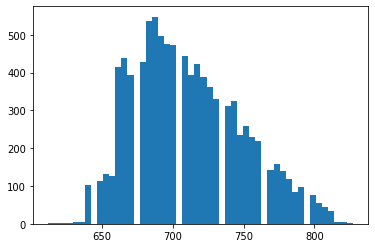

In [12]:
plt.hist(loans['fico'], bins=50, label='FICO')

(array([8045.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1533.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

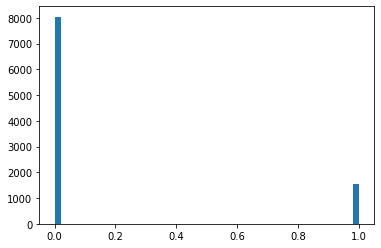

In [13]:
plt.hist(loans['not.fully.paid'], bins=50, label='Not Fully Paid')

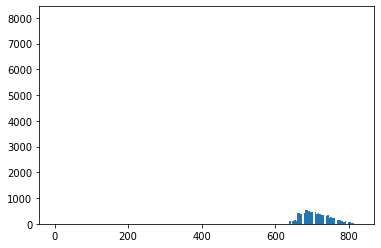

In [14]:
plt.hist(loans['fico'], bins=50, label='FICO')
plt.hist(loans['not.fully.paid'], bins=50, label='Not Fully Paid')
plt.show()

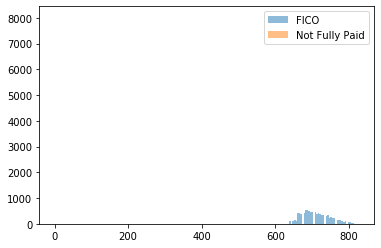

In [15]:
plt.hist(loans['fico'], bins=50, label='FICO', alpha=0.5)
plt.hist(loans['not.fully.paid'], bins=50, label='Not Fully Paid',alpha=0.5)
plt.legend(loc='best')
plt.show()

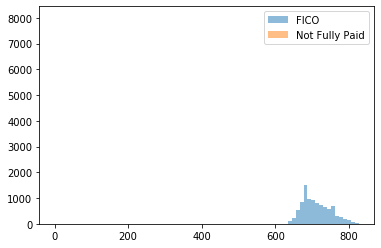

In [16]:
plt.hist(loans['fico'], bins=20, label='FICO', alpha=0.5)
plt.hist(loans['not.fully.paid'], bins=20, label='Not Fully Paid',alpha=0.5)
plt.legend(loc='best')
plt.show()

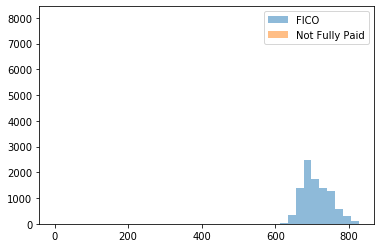

In [17]:
plt.hist(loans['fico'], bins=10, label='FICO', alpha=0.5)
plt.hist(loans['not.fully.paid'], bins=10, label='Not Fully Paid',alpha=0.5)
plt.legend(loc='best')
plt.show()

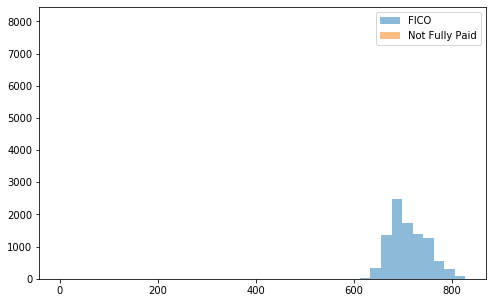

In [18]:
plt.figure(figsize=(8,5))
plt.hist(loans['fico'], bins=10, label='FICO', alpha=0.5)
plt.hist(loans['not.fully.paid'], bins=10, label='Not Fully Paid',alpha=0.5)
plt.legend(loc='best')
plt.show()

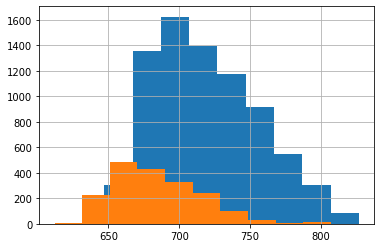

In [19]:
loans[loans['credit.policy']==1]['fico'].hist() #.plot.hist also works fine here
loans[loans['credit.policy']==0]['fico'].hist()

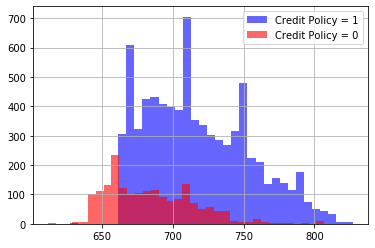

In [20]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                              label='Credit Policy = 1',
                                              alpha=0.6) #adding bins,colors, blue for actual credit policy, alpha for transparency
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='Credit Policy = 0',
                                              alpha=0.6)  #and red for not a credit policy
plt.legend()

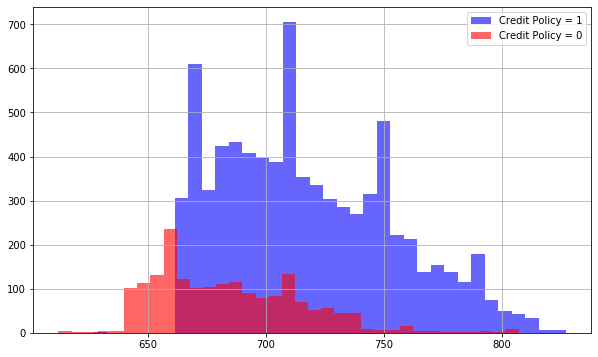

In [21]:
plt.figure(figsize=(10,6)) 
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                              label='Credit Policy = 1',
                                              alpha=0.6) #adding bins,colors, blue for actual credit policy, alpha for transparency
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='Credit Policy = 0',
                                              alpha=0.6)  #and red for not a credit policy
plt.legend()

Text(0.5, 0, 'FICO')

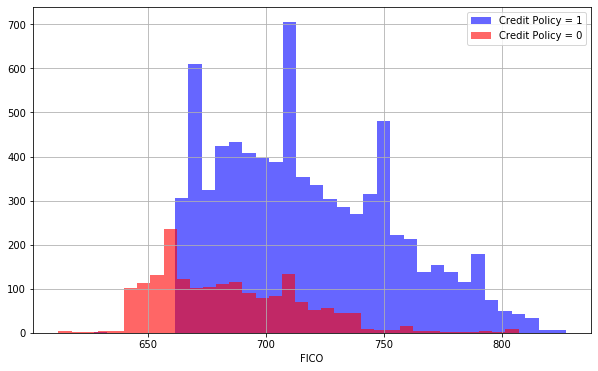

In [22]:
plt.figure(figsize=(10,6)) #expand the figure size

loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                              label='Credit Policy = 1',
                                              alpha=0.6) #adding bins,colors, blue for actual credit policy, alpha for transparency
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='Credit Policy = 0',
                                              alpha=0.6)  #and red for not a credit policy
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

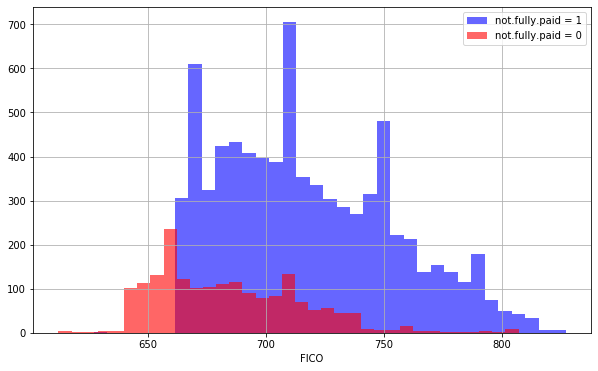

In [23]:
#not.fully.paid column

plt.figure(figsize=(10,6)) #expand the figure size

loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                              label='not.fully.paid = 1',
                                              alpha=0.6) #adding bins,colors, blue for actual credit policy, alpha for transparency
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='not.fully.paid = 0',
                                              alpha=0.6)  #and red for not a credit policy
plt.legend()
plt.xlabel("FICO")

In [25]:
sns.set_style('whitegrid')

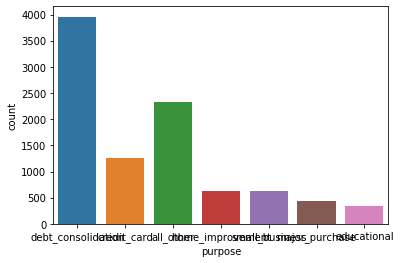

In [24]:
#seaborn.countplot showing the counts of loans 
#by purpose, with the color hue defined by not.fully.paid

sns.countplot(x='purpose',data=loans)

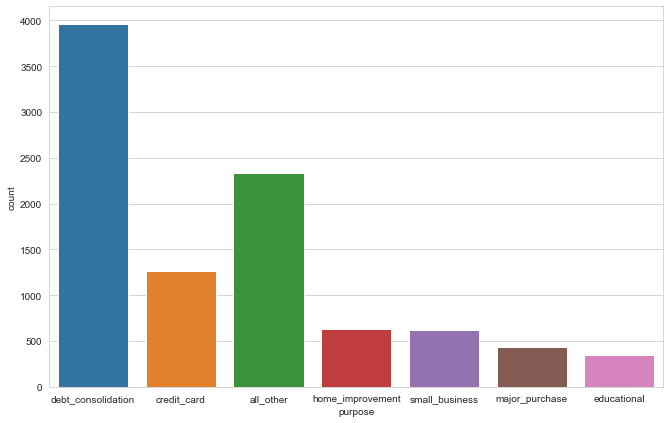

In [26]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans)

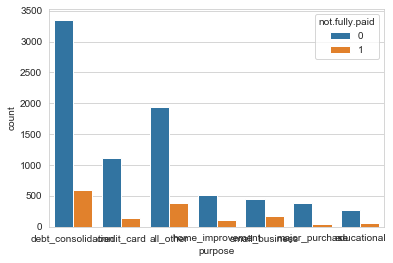

In [27]:
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

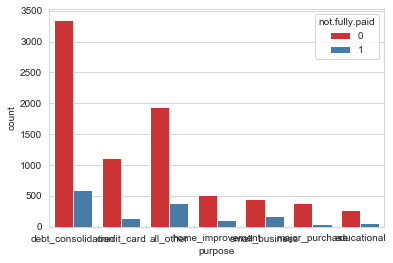

In [28]:
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

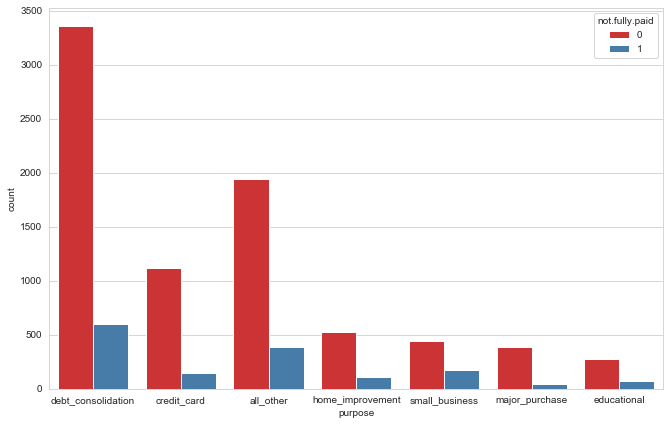

In [29]:
plt.figure(figsize=(11,7)) #to not have the overlap 
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

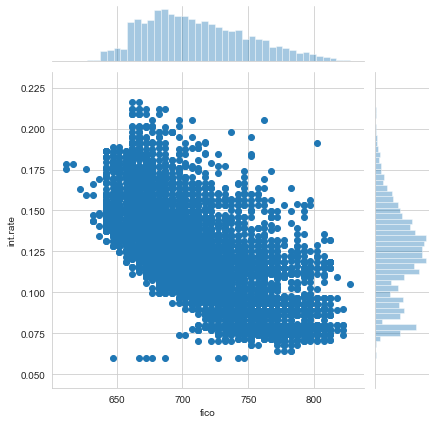

In [30]:
#trend between FICO and interest rate
sns.jointplot(x='fico',y='int.rate',data=loans)

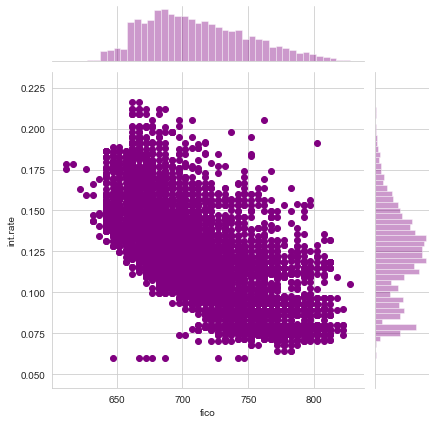

In [31]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

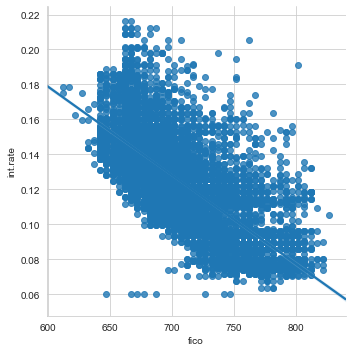

In [32]:
#lmplots,if the trend differed between not.fully.paid and credit.policy
sns.lmplot(x='fico',y='int.rate',data=loans)

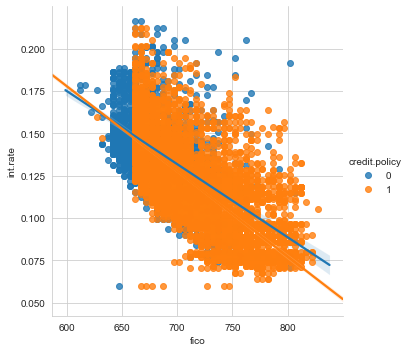

In [33]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy')

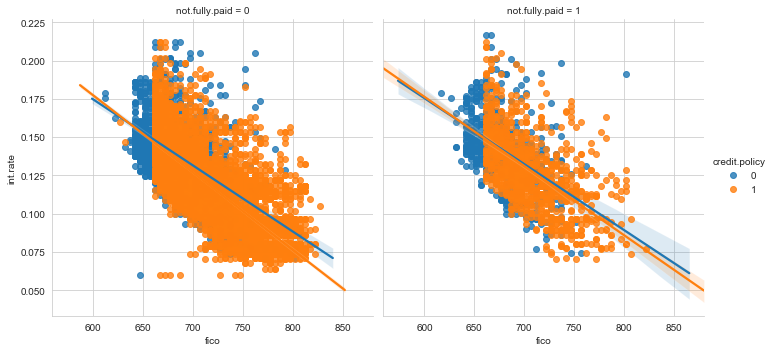

In [34]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid')

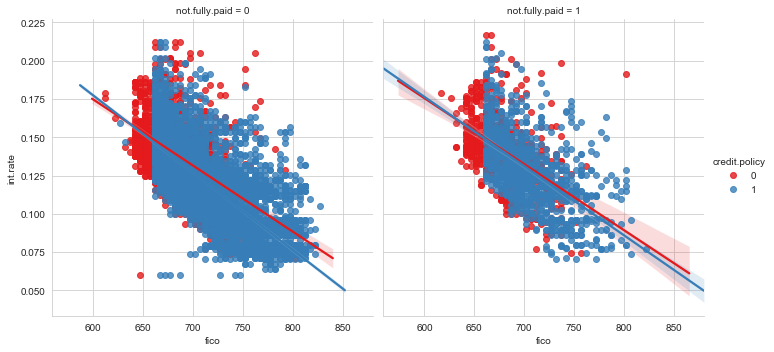

In [35]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

<Figure size 792x504 with 0 Axes>

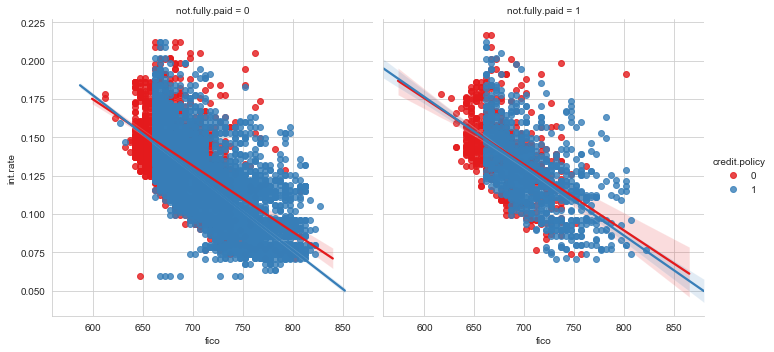

In [36]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

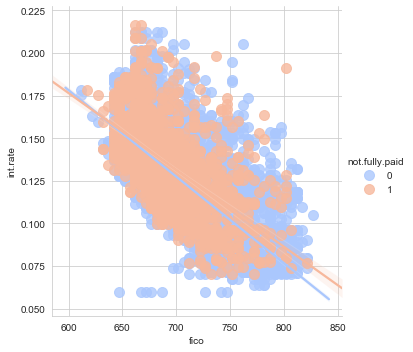

In [37]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='not.fully.paid',palette='coolwarm',markers=['o','o'],scatter_kws={'s':100})

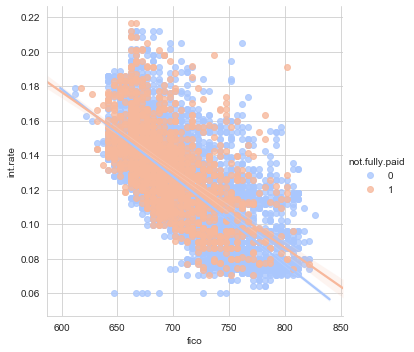

In [38]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='not.fully.paid',palette='coolwarm')

In [40]:
#data for Random Forest Classification Model
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Categorical Features
Transforming the categorical featues using dummy variables, for sklearn to understand them. 
It's a way of dealing with these columns that can be expanded to multiple categorical features if necessary. 

In [47]:
cat_feats=loans.purpose

In [48]:
cat_feats = ['purpose'] #categorical

In [49]:
cat_feats

['purpose']

In [50]:
#to create a fixed larger dataframe with new feature columns with dummy variables

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True) 

In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [52]:
#purpose columns: credit card, debt consolidation, educational, home improvement
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


##### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#y:value to predict.Here, it is 'not.fully.paid' column
#X:everything else which is 'final_data'
#drop the 'not.fully.paid' column, along X = 1 since it's a column

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Training a Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
#dtree=instance of DecisionTreeClassifier() 
#called and fit it to the training data

dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Predictions and Evaluation of Decision Tree
-predictions from the test set

-create a classification report

-create a confusion matrix

In [58]:
predictions = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [61]:
print(confusion_matrix(y_test,predictions))

[[1997  434]
 [ 341  102]]


##### Training the Random Forest model

-create an instance of the RandomForestClassifier class

-fit it to our training data from the previous step

In [63]:
#Random Forest is from the ensemble family 
#because it's an ensemble of Decision Tree

from sklearn.ensemble import RandomForestClassifier

In [64]:
#select the number of estimators, around 300 because this data is quite large

rfc = RandomForestClassifier(n_estimators=300)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Predictions and Evaluation

In [66]:
#predict y_test values and evaluate the model
#predict the class of not.fully.paid for the X_test data

predictions = rfc.predict(X_test)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [69]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 435    8]]


In [70]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 435    8]]
